In [2]:
import sys
import os
import pandas as pd
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from fetchStockData import fetch_historical_data

# extract multiple datasets  and concatenate in one dataset for analysis
# List of stocks
stocks = ['AAPL','AMZN','GOOG','META', 'MSFT', 'NVDA','TSLA']
# Fetch historical data for list of stocks

 # Fetch data for AAPL, GOOGL, and MSFT, etc
df = fetch_historical_data(stocks, start_date='2010-01-01', end_date='2023-01-01')
    
# Explore the results
df.head()

,Open,High,Low,Close,Volume,stock
Date,,,,,,
2022-12-30,126.933,128.457,125.967,128.437,77929881.0,AAPL
2022-12-29,126.519,128.981,126.262,128.120,76583912.0,AAPL
2022-12-28,128.180,129.522,124.423,124.591,86431778.0,AAPL
2022-12-27,129.869,129.899,127.240,128.536,69810179.0,AAPL
2022-12-23,129.414,130.893,128.150,130.345,64556865.0,AAPL


In [3]:
# get size of the dataset
df.shape

(21119, 6)

In [4]:
# check missing values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
stock     0
dtype: int64

In [5]:
# check the data types
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
stock      object
dtype: object

In [6]:


# check duplicates
df.duplicated().sum()



np.int64(0)

In [13]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

print(df[['Close', 'Daily_Return']].head(30))

              Close  Daily_Return
Date                             
2022-12-30  128.437           NaN
2022-12-29  128.120     -0.002468
2022-12-28  124.591     -0.027544
2022-12-27  128.536      0.031664
2022-12-23  130.345      0.014074
2022-12-22  130.709      0.002793
2022-12-21  133.895      0.024375
2022-12-20  130.779     -0.023272
2022-12-19  130.848      0.000528
2022-12-16  132.965      0.016179
2022-12-15  134.930      0.014778
2022-12-14  141.563      0.049159
2022-12-13  143.797      0.015781
2022-12-12  142.831     -0.006718
2022-12-09  140.526     -0.016138
2022-12-08  141.010      0.003444
2022-12-07  139.319     -0.011992
2022-12-06  141.268      0.013989
2022-12-05  144.945      0.026029
2022-12-02  146.111      0.008044
2022-12-01  146.606      0.003388
2022-11-30  146.328     -0.001896
2022-11-29  139.547     -0.046341
2022-11-28  142.562      0.021606
2022-11-25  146.408      0.026978
2022-11-23  149.336      0.019999
2022-11-22  148.454     -0.005906
2022-11-21  14

In [14]:


# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

print(df[['Close', 'Cumulative_Return']].head(30))



              Close  Cumulative_Return
Date                                  
2022-12-30  128.437                NaN
2022-12-29  128.120           0.997532
2022-12-28  124.591           0.970055
2022-12-27  128.536           1.000771
2022-12-23  130.345           1.014856
2022-12-22  130.709           1.017690
2022-12-21  133.895           1.042496
2022-12-20  130.779           1.018235
2022-12-19  130.848           1.018772
2022-12-16  132.965           1.035255
2022-12-15  134.930           1.050554
2022-12-14  141.563           1.102198
2022-12-13  143.797           1.119592
2022-12-12  142.831           1.112071
2022-12-09  140.526           1.094124
2022-12-08  141.010           1.097892
2022-12-07  139.319           1.084726
2022-12-06  141.268           1.099901
2022-12-05  144.945           1.128530
2022-12-02  146.111           1.137608
2022-12-01  146.606           1.141462
2022-11-30  146.328           1.139298
2022-11-29  139.547           1.086502
2022-11-28  142.562      

In [15]:


# Save the clean data to csv in Data directory
df.to_csv('../Data/stock_data.csv')



In [18]:
# stockAnalysis.py

import pandas as pd
import matplotlib.pyplot as plt

def load_data(stock):
    # Load your stock data here
    pass

def plot_stock_data(stock, df):
    # Create your stock plot here
    pass

def plot_rsi(stock, df):
    # Create RSI plot here
    pass

def plot_macd(stock, df):
    # Create MACD plot here
    pass

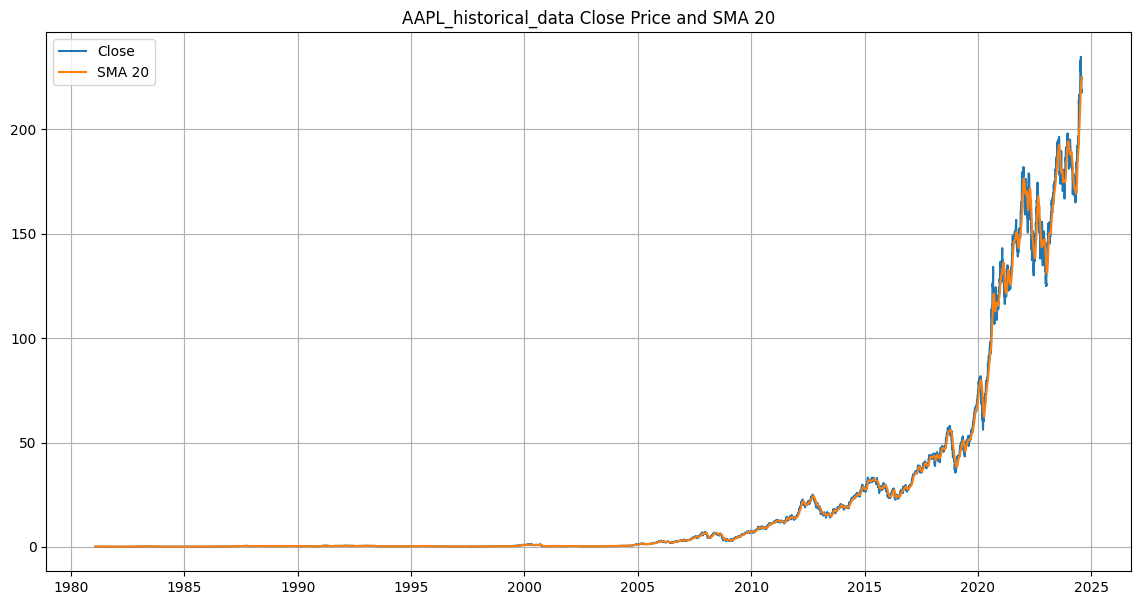

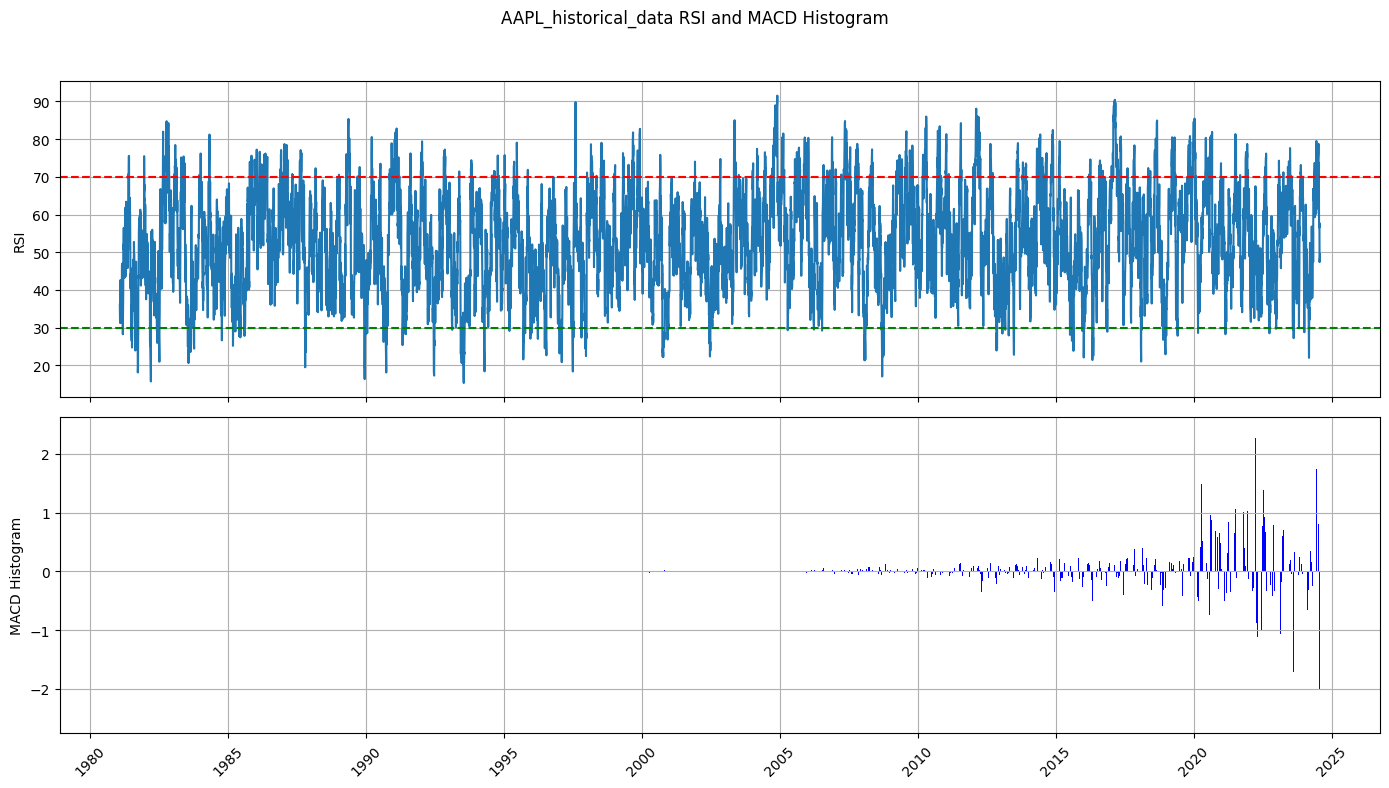

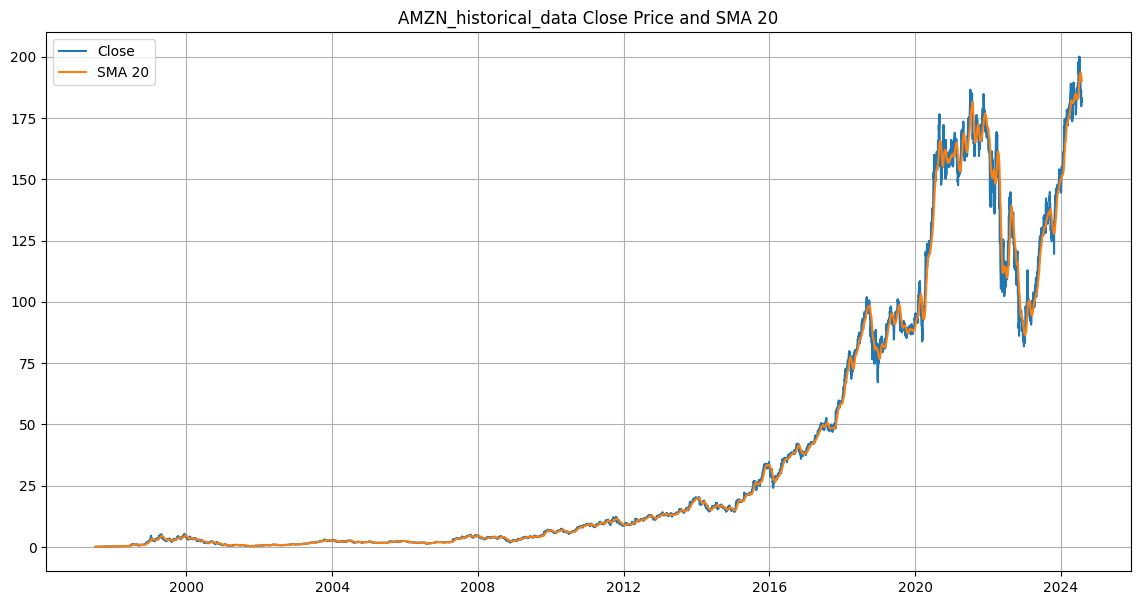

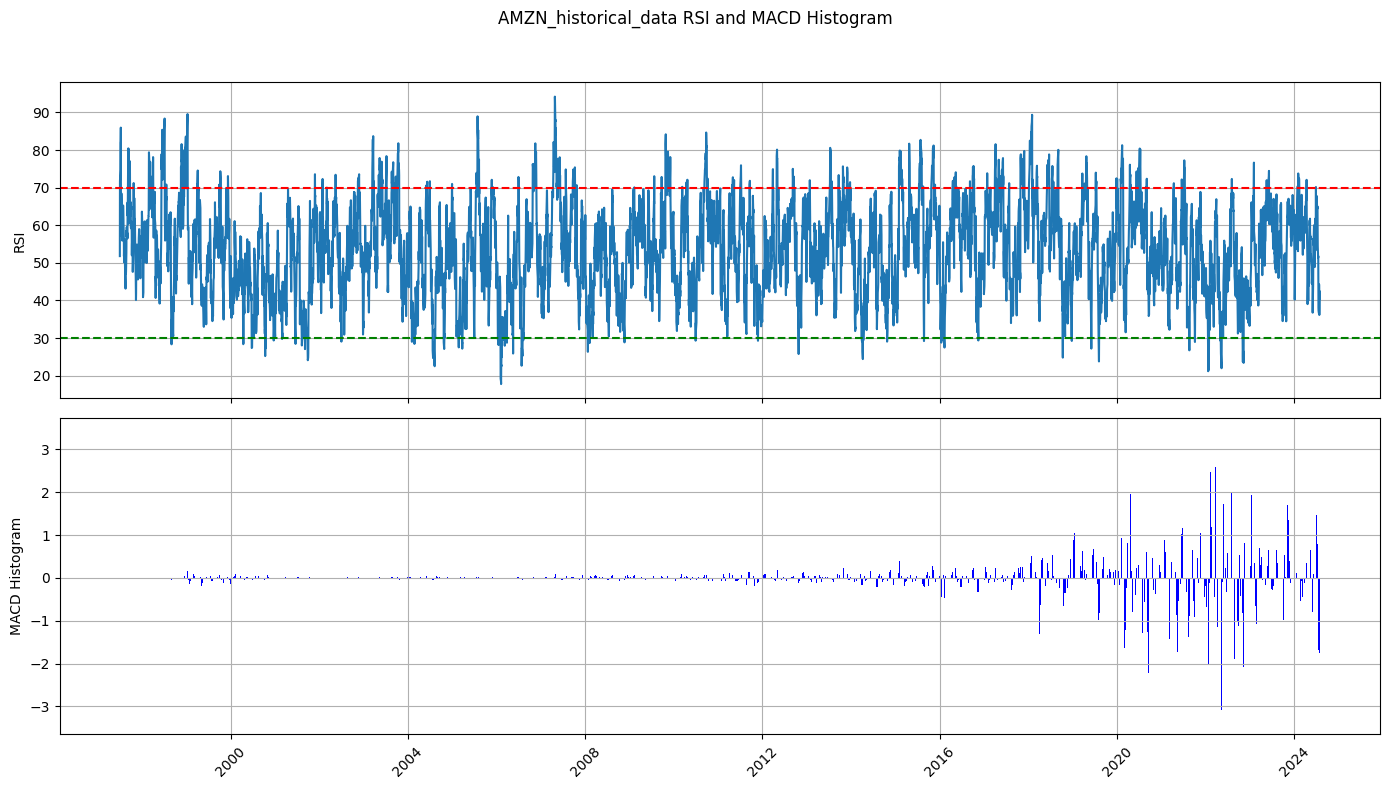

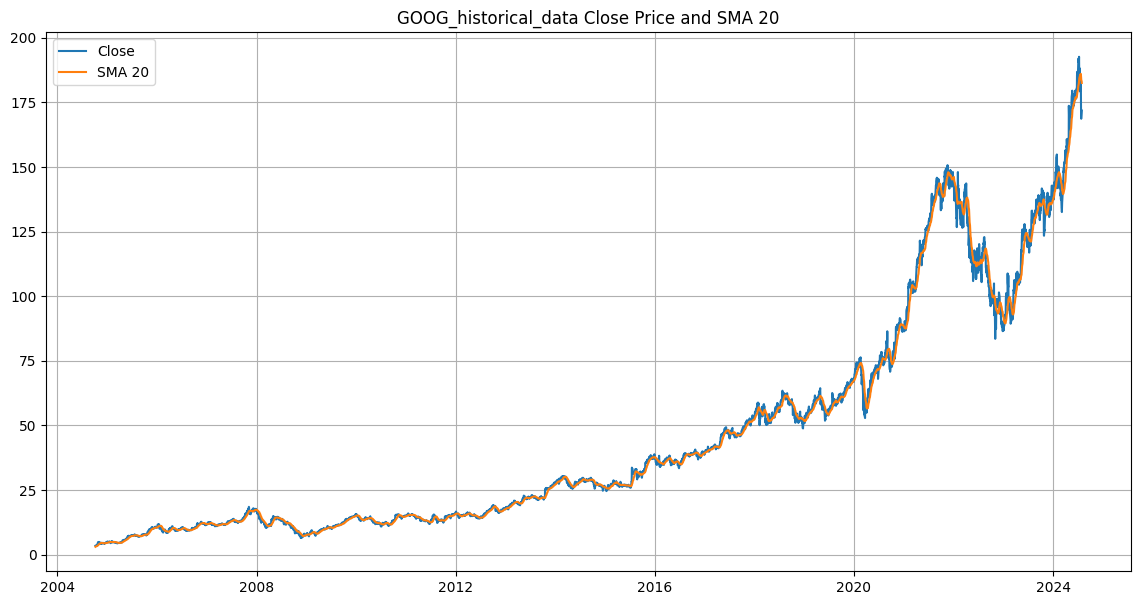

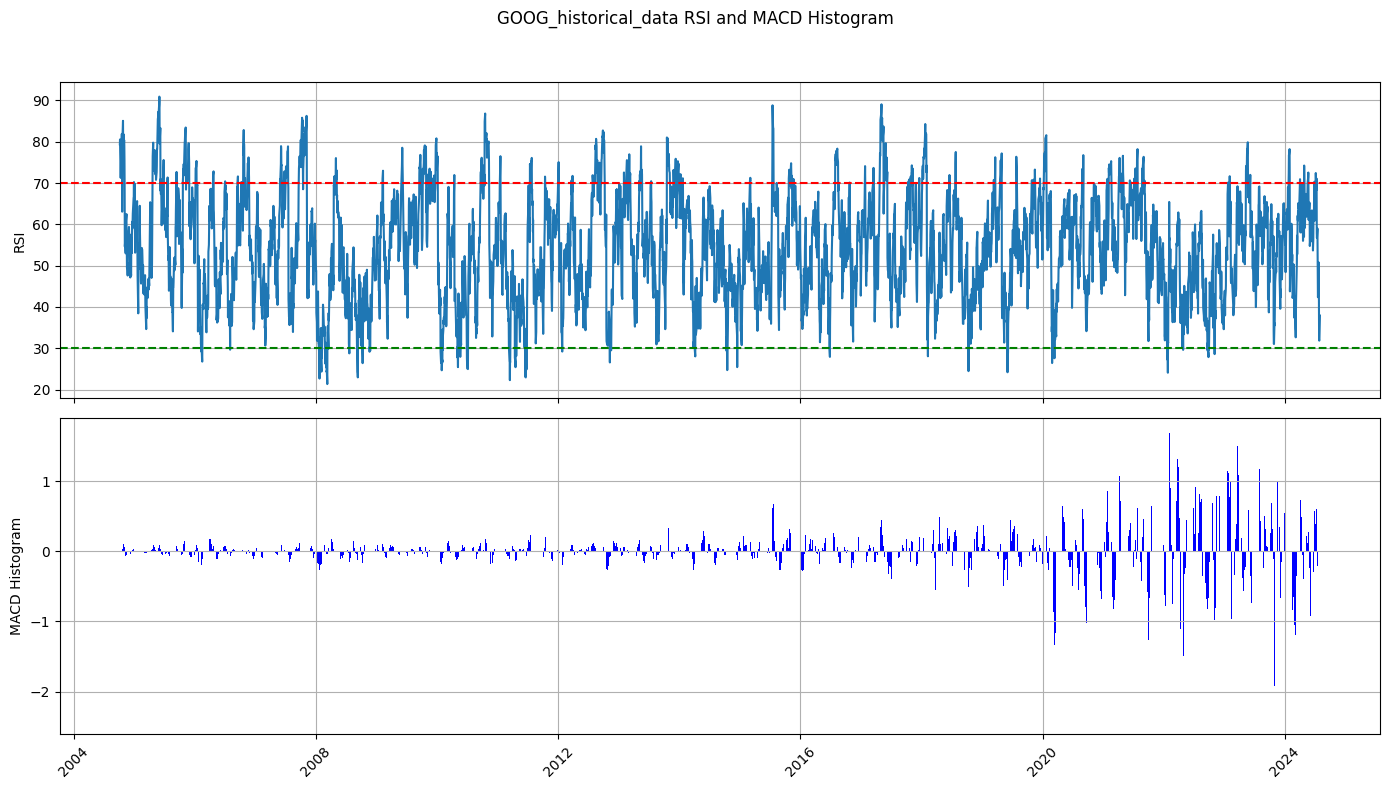

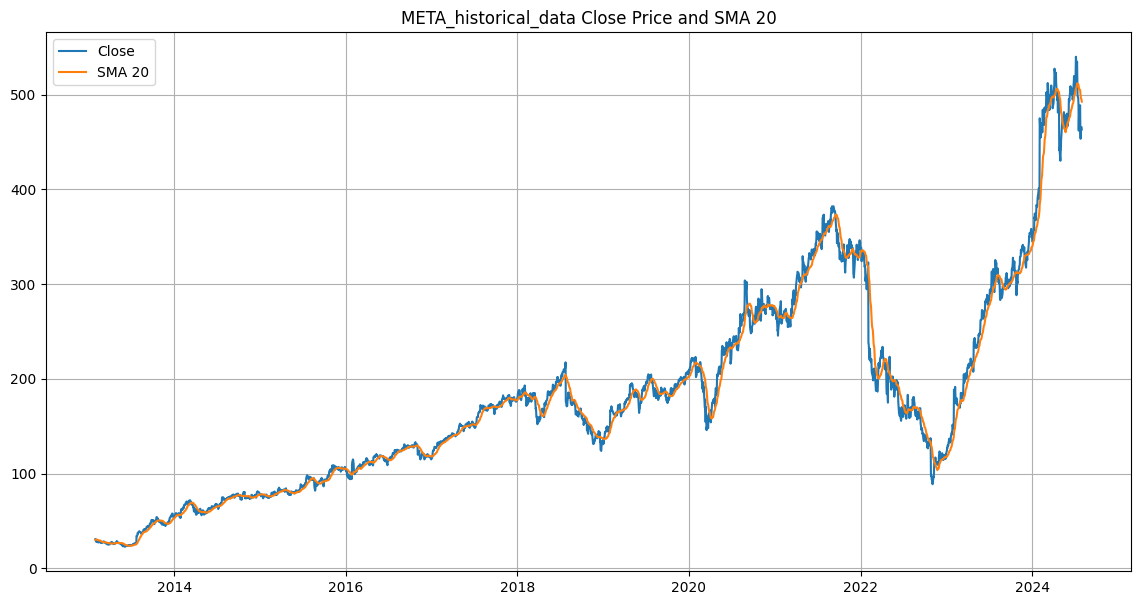

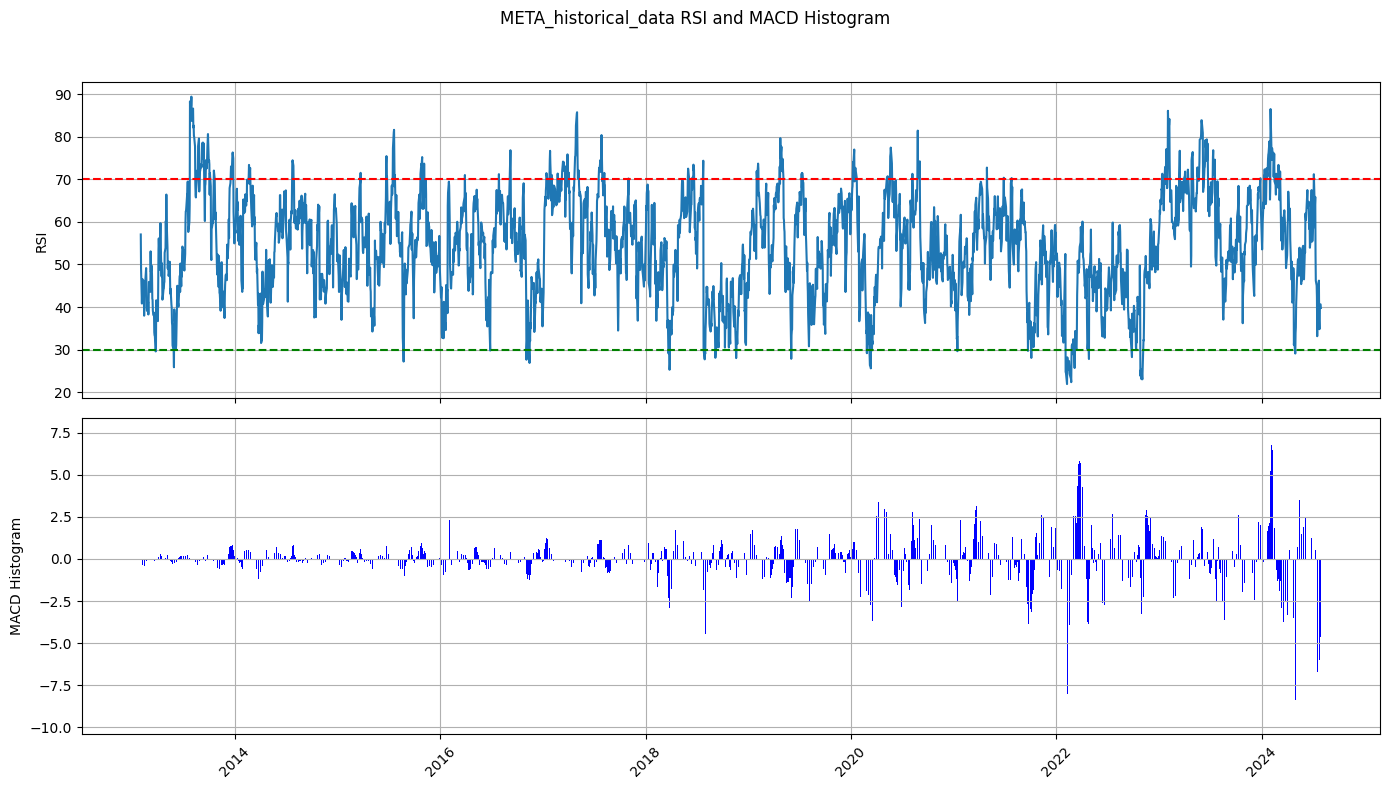

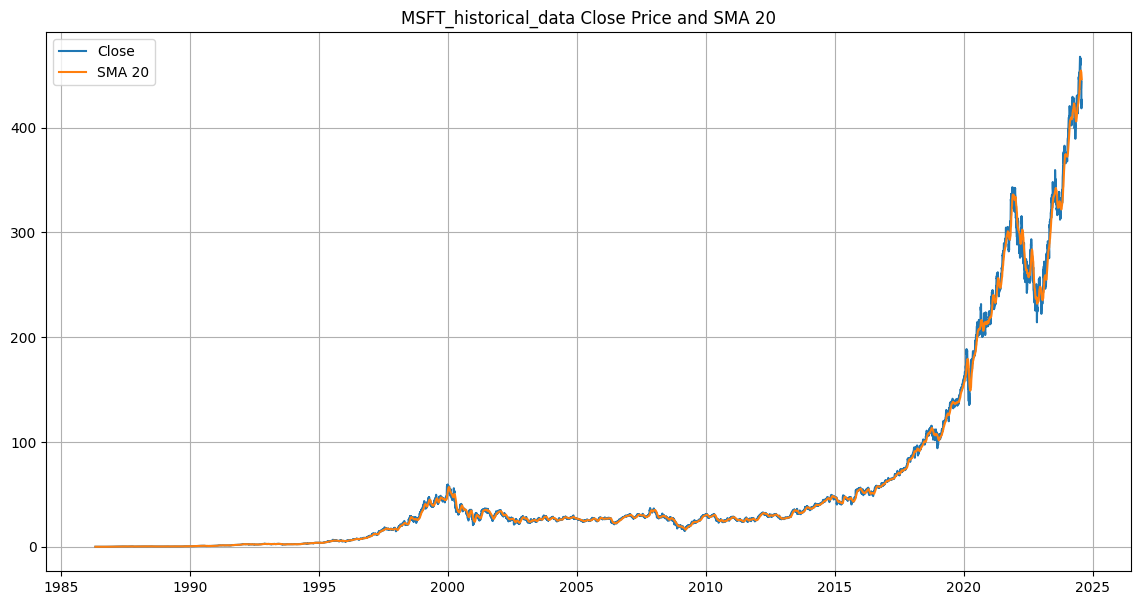

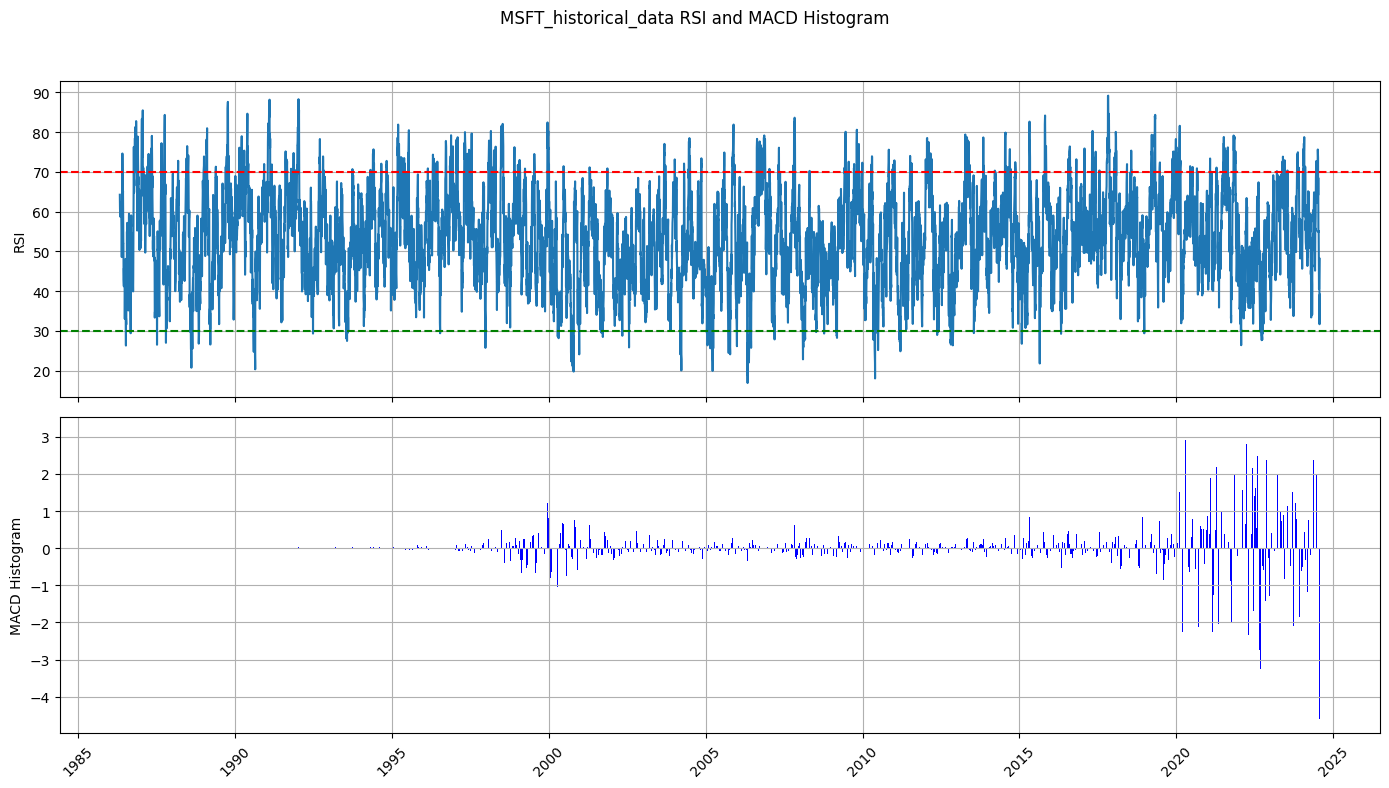

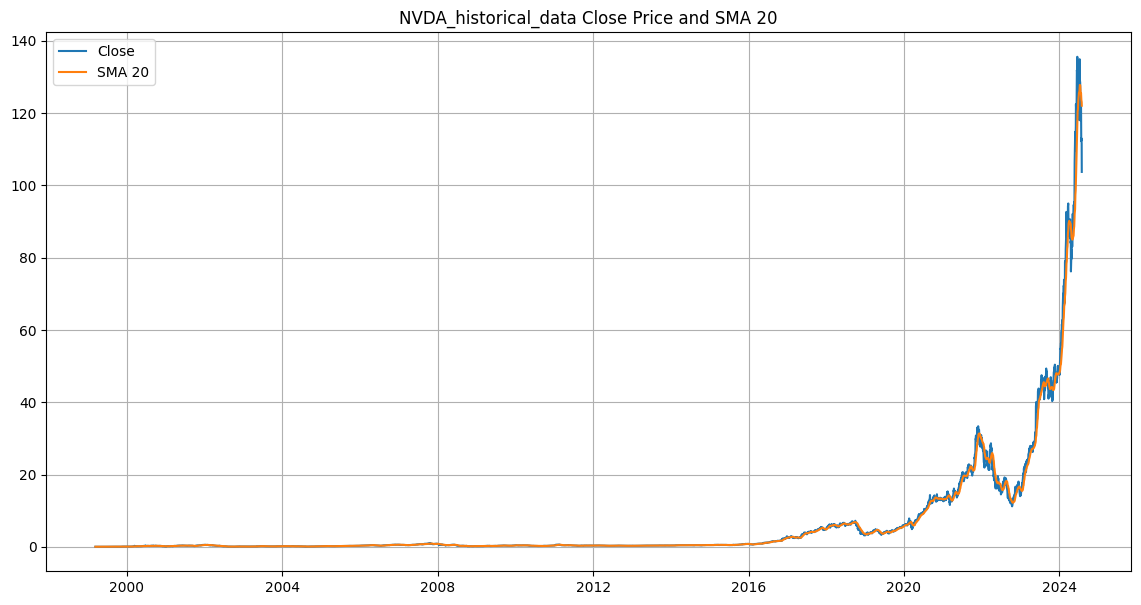

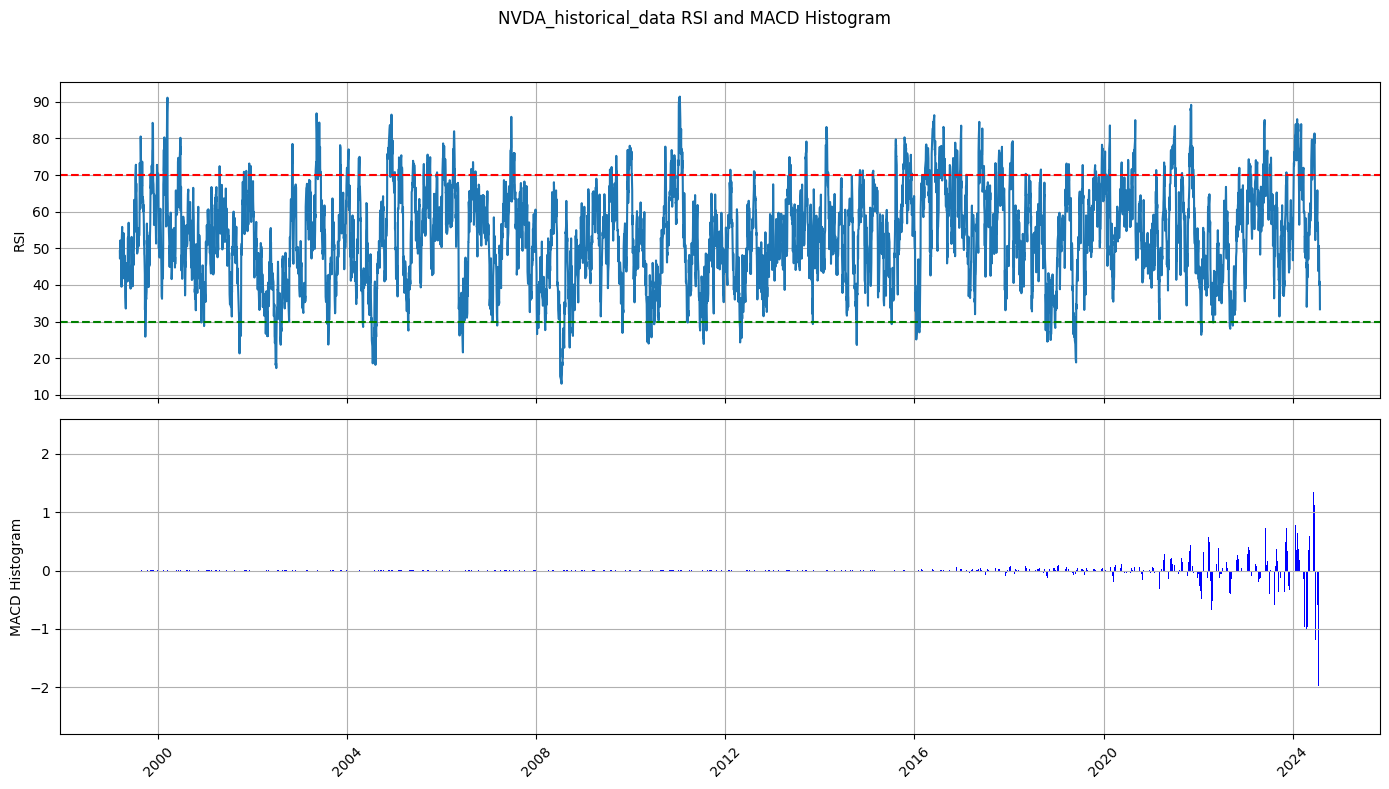

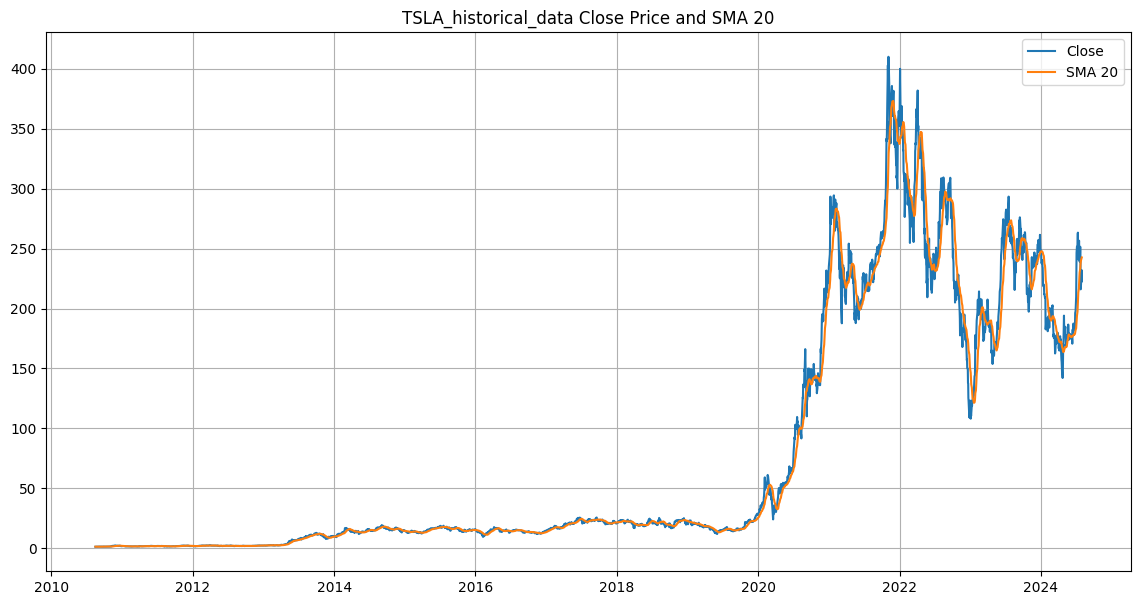

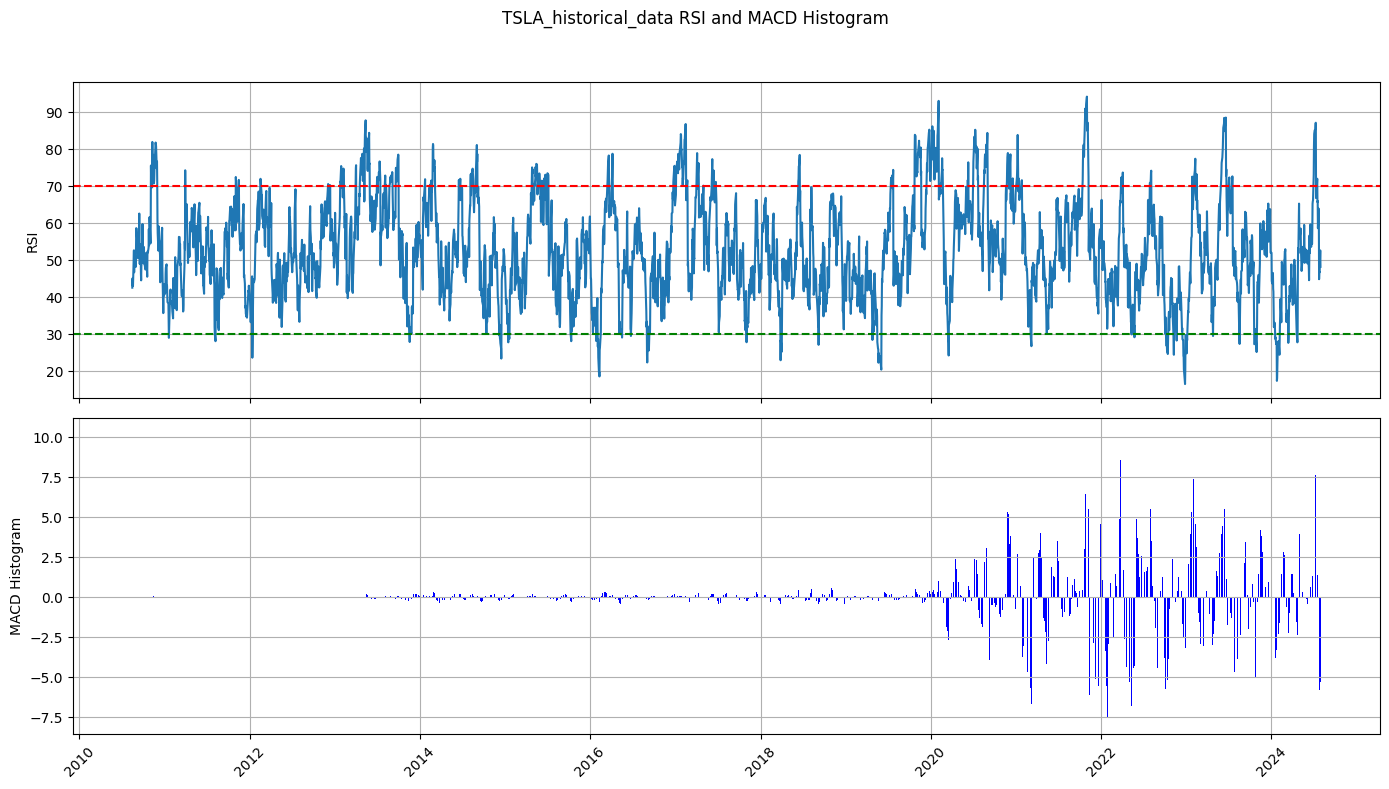

In [28]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ta

# Load and merge CSV files
csv_files = glob.glob(os.path.join('../data/yfinance_data', '*.csv'))
dfs = []

for file in csv_files:
    symbol = os.path.splitext(os.path.basename(file))[0]
    df_temp = pd.read_csv(file)
    df_temp['Symbol'] = symbol
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

# Preprocess Date and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values(['Date', 'Symbol'])
df.set_index('Date', inplace=True)

# Calculate indicators per symbol using ta
indicator_dfs = []

for symbol, group in df.groupby('Symbol'):
    group = group.copy()

    # Add SMA 20
    group['SMA_20'] = ta.trend.sma_indicator(group['Close'], window=20)
    # Add EMA 20
    group['EMA_20'] = ta.trend.ema_indicator(group['Close'], window=20)
    # Add RSI 14
    group['RSI_14'] = ta.momentum.rsi(group['Close'], window=14)

    # MACD (returns series, signal, histogram)
    macd = ta.trend.MACD(group['Close'], window_slow=26, window_fast=12, window_sign=9)
    group['MACD'] = macd.macd()
    group['MACD_signal'] = macd.macd_signal()
    group['MACD_hist'] = macd.macd_diff()

    indicator_dfs.append(group)

df_with_indicators = pd.concat(indicator_dfs)

# Visualize each symbol one by one
symbols = df_with_indicators['Symbol'].unique()

for symbol in symbols:
    example_df = df_with_indicators[df_with_indicators['Symbol'] == symbol].dropna()
    if example_df.empty:
        continue

    # Plot Close and SMA_20
    plt.figure(figsize=(14, 7))
    plt.title(f"{symbol} Close Price and SMA 20")
    plt.plot(example_df.index, example_df['Close'], label='Close')
    plt.plot(example_df.index, example_df['SMA_20'], label='SMA 20')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot RSI and MACD Histogram
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    fig.suptitle(f'{symbol} RSI and MACD Histogram')

    sns.lineplot(x=example_df.index, y=example_df['RSI_14'], ax=ax1)
    ax1.axhline(70, color='r', linestyle='--')
    ax1.axhline(30, color='g', linestyle='--')
    ax1.set_ylabel('RSI')
    ax1.grid(True)

    ax2.bar(example_df.index, example_df['MACD_hist'], color='blue')
    ax2.set_ylabel('MACD Histogram')
    ax2.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()